## This notebook is used for reading and analyzing convergence and shear maps obtained from the GLASS package, which are essential for studying the large-scale structures in the Universe.
## Importing the Data
We begin by defining a function, `read_data_file`, to load the numpy data file. This function takes the file name as an argument, attempts to load the data using the `numpy.load` function, and returns the loaded data. If the file is not found, or if an error occurs while loading the data, the function will print an error message and return `None`.


In [1]:
import numpy as np
def read_data_file(file_name):
    try:
        data = np.load(file_name)
        return data
    except FileNotFoundError:
        print(f"Error: {file_name} not found.")
        return None
    except Exception as e:
        print(f"Error occurred while loading {file_name}: {e}")
        return None

# We then use this function to load our data from the file `kgdata.npy`.

if __name__ == "__main__":
    file_name = "z5data.npy"
    data_array = read_data_file(file_name)
    if data_array is not None:
        print("Data loaded successfully:")
        print(data_array)

kappa_values = data_array[:, 0]  # Get the first column of each row
gamma_values = data_array[:, 1]  # Get the first column of each row
print("Kappa values:")
print(kappa_values)

Data loaded successfully:
[[-0.00255432  0.02133902]
 [-0.00025481  0.01296743]
 [ 0.01669513  0.01662829]
 ...
 [-0.01787878  0.02803755]
 [-0.01792904  0.02443411]
 [-0.02205953  0.03260615]]
Kappa values:
[-0.00255432 -0.00025481  0.01669513 ... -0.01787878 -0.01792904
 -0.02205953]


## Visualizing the Data

We use seaborn's `jointplot` function to visualize the joint distribution of kappa and gamma values. This provides a visual understanding of the correlation between these two variables.

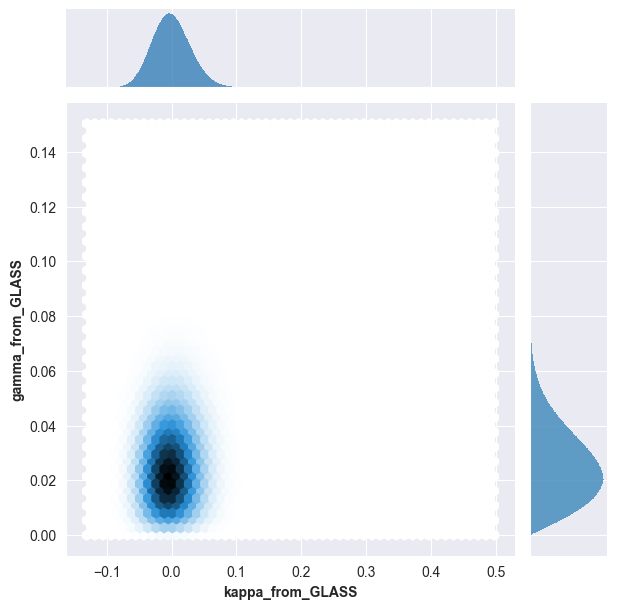

Spearman's correlation coefficient:  SignificanceResult(statistic=0.04618314332001441, pvalue=0.0)
Kendall's correlation coefficient:  SignificanceResult(statistic=0.0308001762096925, pvalue=0.0)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
kappa_values = data_array[:, 0]
gamma_values = data_array[:, 1]

glass_plot = sns.jointplot(x=kappa_values, y=gamma_values, kind='hex')
glass_plot.ax_joint.set_xlabel('kappa_from_GLASS', fontweight='bold')
glass_plot.ax_joint.set_ylabel('gamma_from_GLASS', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print("Spearman's correlation coefficient: ", spearmanr(kappa_values, gamma_values))
print("Kendall's correlation coefficient: ", kendalltau(kappa_values, gamma_values))

## Fitting the Data

Next, we fit the joint distribution of kappa and gamma values using a Gaussian Kernel Density Estimation (KDE). After fitting the KDE, we generate a random sample from this distribution and plot the joint distribution of these random values.


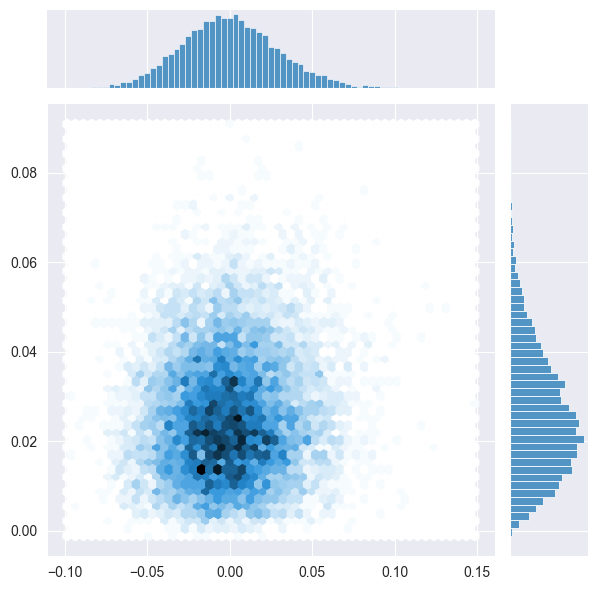

In [6]:
from scipy import stats

# Use Gaussian KDE to fit the joint distribution
kernel = stats.gaussian_kde(np.vstack([kappa_values, gamma_values]))
n = 10000  # Number of random numbers to generate
kappa_random, gamma_random = kernel.resample(n)
sns.jointplot(x=kappa_random, y=gamma_random, kind='hex')
plt.show()

In [7]:
import numpy as np
n = int(np.sqrt(len(kappa_values)/12))
print(n)

2048
